In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [2]:
import ipykernel
print(ipykernel.__version__)

7.0.0


In [3]:
import sys
print(sys.executable)

c:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\myenv\Scripts\python.exe


### Reading Data

In [4]:
product_detail = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\product_details.csv")
store_info = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\store_info.csv")
supplier_info = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\supplier_info.csv")
weather_data = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\weather_data.csv")
weekly_sales = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\weekly_sales.csv")

#### DATA DETAILS

##### Product details 

In [5]:
pd.concat([product_detail.head(), product_detail.tail()])

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,1000,Whole Wheat Bread 800g,Bakery,4,4
1,1001,White Sandwich Loaf,Bakery,2,8
2,1002,Croissant 4-pack,Bakery,2,5
3,1003,Blueberry Muffins 6-pack,Bakery,4,10
4,1004,Chocolate Chip Cookies,Bakery,4,7
43,1043,English Breakfast Tea 80bags,Beverages,246,9
44,1044,Sparkling Water 1L,Beverages,186,1
45,1045,Lemonade 2L,Beverages,356,9
46,1046,Protein Shake 4-pack,Beverages,158,8
47,1047,Green Tea 40bags,Beverages,92,3


##### Store_info data

In [6]:
pd.concat([store_info.head(), store_info.tail()])

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330
10,510,North East,3000,784
11,511,South West,3000,634
12,512,South East,5000,1697
13,513,South West,4000,1322
14,514,South West,3000,1001


##### Supplier_info data

In [7]:
pd.concat([supplier_info.head(), supplier_info.tail()])

,Supplier_ID,Supplier_Name,Lead_Time_Days,Supply_Capacity
0,1,FreshFoods UK Ltd.,1,68047
1,2,Quality Provisions Co.,2,35230
2,3,FarmDirect Suppliers Ltd.,2,71976
3,4,PremiumGoods Wholesale,3,48776
4,5,LocalHarvest Distributors,2,11306
5,6,OrganicChoice Partners,2,31776
6,7,SwiftDelivery Foods UK,2,59474
7,8,TrustedSource Provisions,3,46959
8,9,GreenValley Suppliers,3,54320
9,10,BestQuality Foods Ltd.,2,53748


##### Weather data

In [8]:
pd.concat([weather_data.head(), weather_data.tail()])

,Week_Number,Region,Avg_Temperature,Rainfall,Holiday_Flag
0,2024-W01,Midlands,7.4,32.1,0
1,2024-W01,South East,10.5,15.7,0
2,2024-W01,North West,6.8,28.5,1
3,2024-W01,London,9.9,23.0,1
4,2024-W01,South West,10.0,45.9,1
359,2024-W52,North West,7.4,17.2,1
360,2024-W52,London,11.6,10.4,1
361,2024-W52,South West,8.7,16.2,1
362,2024-W52,North East,5.2,19.2,1
363,2024-W52,Wales,9.6,12.8,1


##### Weekly sales data

In [9]:
pd.concat([weekly_sales.head(), weekly_sales.tail()])

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46
37435,2024-W52,1043,514,895,488.97,15,22,1.62
37436,2024-W52,1044,514,1558,657.76,10,38,5.05
37437,2024-W52,1045,514,993,442.56,0,24,5.72
37438,2024-W52,1046,514,2168,1502.52,25,54,3.82
37439,2024-W52,1047,514,658,940.83,0,16,4.37


# data reading ends

Text(0, 0.5, 'Wastage Units')

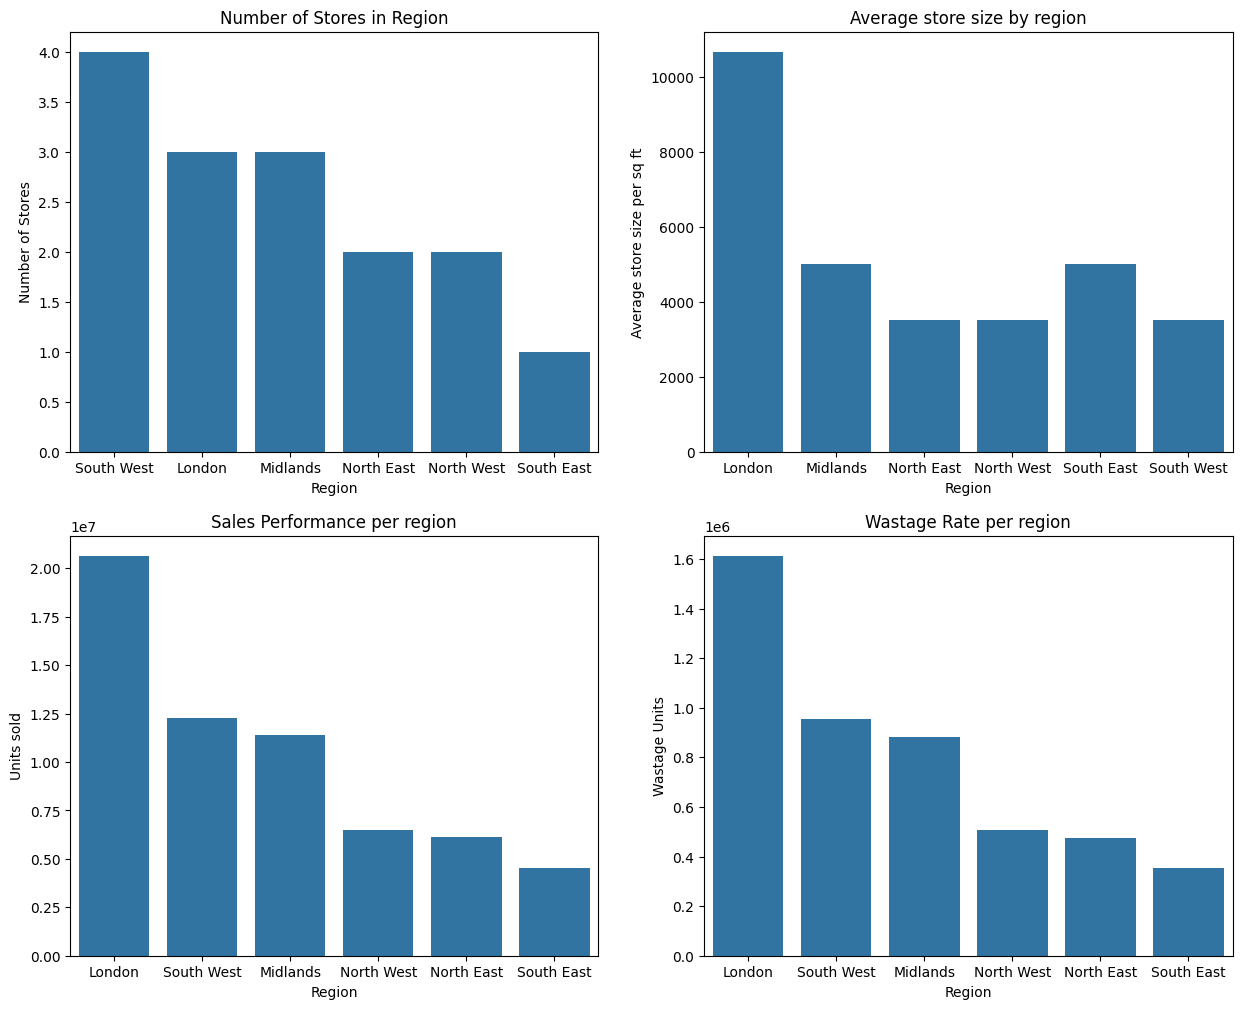

In [10]:
# Sales Performance by Region
plt.figure(figsize=(15, 12))

# Number of stores per region
plt.subplot(2, 2, 1)
region_store_counts = store_info['Region'].value_counts()
sns.barplot(x=region_store_counts.index, y=region_store_counts.values)
plt.title("Number of Stores in Region")
plt.xlabel("Region")
plt.ylabel("Number of Stores")

# Average store size per region
plt.subplot(2, 2, 2)
store_size_by_region = store_info.groupby('Region')['Store_Size'].mean()
sns.barplot(x=store_size_by_region.index, y=store_size_by_region.values)
plt.title("Average store size by region")
plt.xlabel("Region")
plt.ylabel("Average store size per sq ft")

# Sales performance per region
plt.subplot(2, 2, 3)
region_sales = weekly_sales.merge(store_info, on="Store_ID")
store_region_performance = region_sales.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
sns.barplot(x=store_region_performance.index, y=store_region_performance.values)
plt.title("Sales Performance per region")
plt.xlabel("Region")
plt.ylabel("Units sold")

# Wastage rate per region
plt.subplot(2, 2, 4)
goods_wastage_by_region = region_sales.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
sns.barplot(x=goods_wastage_by_region.index, y=goods_wastage_by_region.values)
plt.title("Wastage Rate per region")
plt.xlabel("Region")
plt.ylabel("Wastage Units")